2: Implementing Feedforward neural networks with Keras and TensorFlow
</br>
a. Import the necessary packages
</br>
b. Load the training and testing data (MNIST/CIFAR10)
</br>
c. Define the network architecture using Keras
</br>
d. Train the model using SGD
</br>
e. Evaluate the network
</br>
f. Plot the training loss and accuracy
</br>

**datasets: MNIST, CIFER10**

#### a. Import the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

2023-11-01 20:15:58.901319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### b. Load the training and testing data (MNIST/CIFAR10)

In [6]:
train_data_dir = 'Datasets/minist-jpg/train'
test_data_dir = 'Datasets/minist-jpg/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=batch_size,
    class_mode='categorical', 
     color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_generator = test_datagen.flow_from_directory(
 train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
      color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


#### c. Define the network architecture using Keras

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#### d. Train the model using SGD

In [8]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.6515 - accuracy: 0.8357
Epoch 2/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.3402 - accuracy: 0.9047
Epoch 3/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.2923 - accuracy: 0.9176
Epoch 4/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.2625 - accuracy: 0.9258
Epoch 5/10
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2400 - accuracy: 0.9329
Epoch 6/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2210 - accuracy: 0.9383
Epoch 7/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2053 - accuracy: 0.9432
Epoch 8/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.1917 - accuracy: 0.9471
Epoch 9/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.1796 - accuracy: 0.9502
Epoch 10/10
1875/1875 [========================

#### e. Evaluate the network

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

1875/1875 [==============================] - 180s 96ms/step - loss: 0.1619 - accuracy: 0.9551
Loss:  0.16193413734436035
Accuracy:  0.9550999999046326


1/1 [==============================] - 0s 11ms/step
Actual Number:  4
Predicted Number:  4


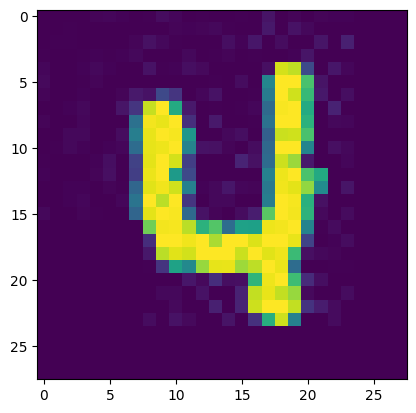

In [56]:
n = 20 
image, label = test_generator[n]
plt.imshow(np.squeeze(image[n]))
predicted_value = model.predict(image)
print("Actual Number: ",np.argmax(label[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

#### f. Plot the training loss and accuracy

In [57]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy'])

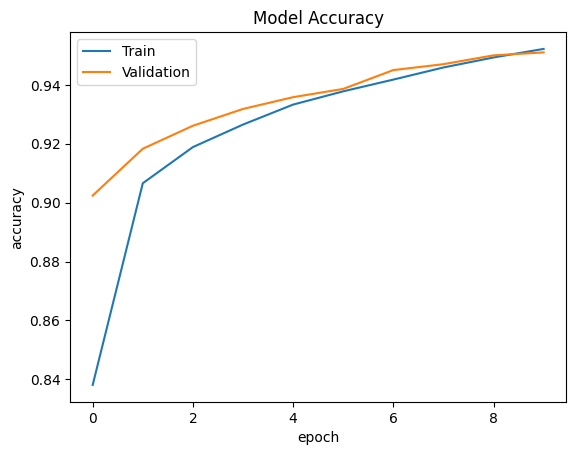

In [57]:
plt.plot(history['accuracy'])
plt.plot(history['test_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

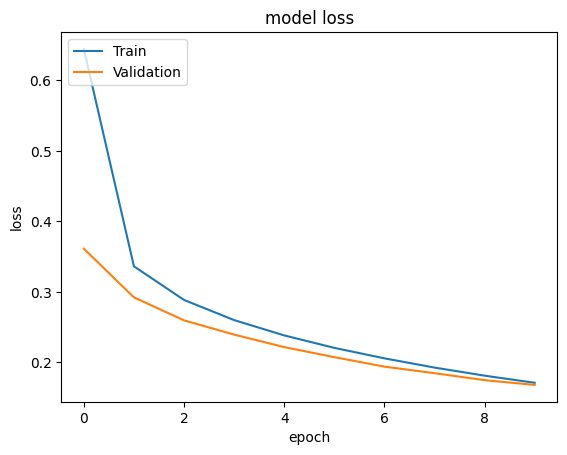

In [59]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

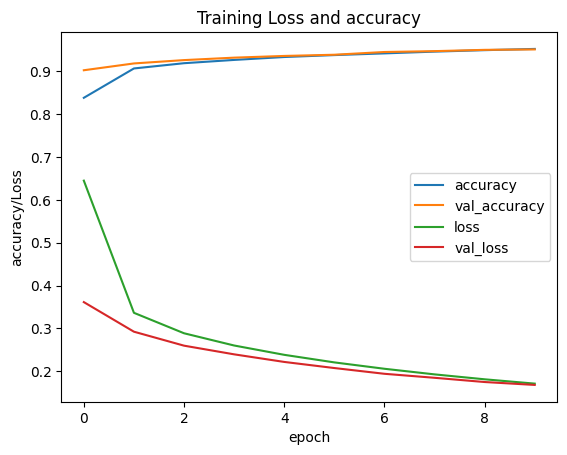

In [61]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])